## Wallmart Data EDA

In the challenge, I am predicting item sales at stores in various locations for two 28-day time periods. Information about the data is found in the M5 Participants Guide.

### Importing Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
from sklearn.preprocessing import LabelEncoder 

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':25,
         'xtick.labelsize': 25,
         'ytick.labelsize':25}
rcParams.update(params)
warnings.filterwarnings('ignore')

In [3]:
le = LabelEncoder()

### Loading CSV Files

In [4]:
calendar = pd.read_csv("calendar.csv")
sales = pd.read_csv("sales_train_validation.csv")
sell_price = pd.read_csv("sell_prices.csv")

### Calendar Data

In [5]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
calendar.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 737.5 KB


In [7]:
calendar["date"] = pd.to_datetime(calendar["date"])

In [8]:
calendar["d"].astype("str")

0          d_1
1          d_2
2          d_3
3          d_4
4          d_5
         ...  
1964    d_1965
1965    d_1966
1966    d_1967
1967    d_1968
1968    d_1969
Name: d, Length: 1969, dtype: object

In [9]:
calendar = calendar.drop(["weekday"], axis=1)

In [10]:
calendar = calendar.fillna(0)

In [11]:
encode_column_label = ["event_name_1", "event_type_1", "event_name_2", "event_type_2"]
for each_column in encode_column_label:
    calendar[each_column] = le.fit_transform(calendar[each_column].astype("str"))
    print(le.classes_)

['0' 'Chanukah End' 'Christmas' 'Cinco De Mayo' 'ColumbusDay' 'Easter'
 'Eid al-Fitr' 'EidAlAdha' "Father's day" 'Halloween' 'IndependenceDay'
 'LaborDay' 'LentStart' 'LentWeek2' 'MartinLutherKingDay' 'MemorialDay'
 "Mother's day" 'NBAFinalsEnd' 'NBAFinalsStart' 'NewYear'
 'OrthodoxChristmas' 'OrthodoxEaster' 'Pesach End' 'PresidentsDay'
 'Purim End' 'Ramadan starts' 'StPatricksDay' 'SuperBowl' 'Thanksgiving'
 'ValentinesDay' 'VeteransDay']
['0' 'Cultural' 'National' 'Religious' 'Sporting']
['0' 'Cinco De Mayo' 'Easter' "Father's day" 'OrthodoxEaster']
['0' 'Cultural' 'Religious']


In [12]:
calendar.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
date            1969 non-null datetime64[ns]
wm_yr_wk        1969 non-null int64
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    1969 non-null int64
event_type_1    1969 non-null int64
event_name_2    1969 non-null int64
event_type_2    1969 non-null int64
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 304.8 KB


In [13]:
calendar

,date,wm_yr_wk,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,1,1,2011,d_1,0,0,0,0,0,0,0
1,2011-01-30,11101,2,1,2011,d_2,0,0,0,0,0,0,0
2,2011-01-31,11101,3,1,2011,d_3,0,0,0,0,0,0,0
3,2011-02-01,11101,4,2,2011,d_4,0,0,0,0,1,1,0
4,2011-02-02,11101,5,2,2011,d_5,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,5,6,2016,d_1965,0,0,0,0,0,1,1
1965,2016-06-16,11620,6,6,2016,d_1966,0,0,0,0,0,0,0
1966,2016-06-17,11620,7,6,2016,d_1967,0,0,0,0,0,0,0
1967,2016-06-18,11621,1,6,2016,d_1968,0,0,0,0,0,0,0


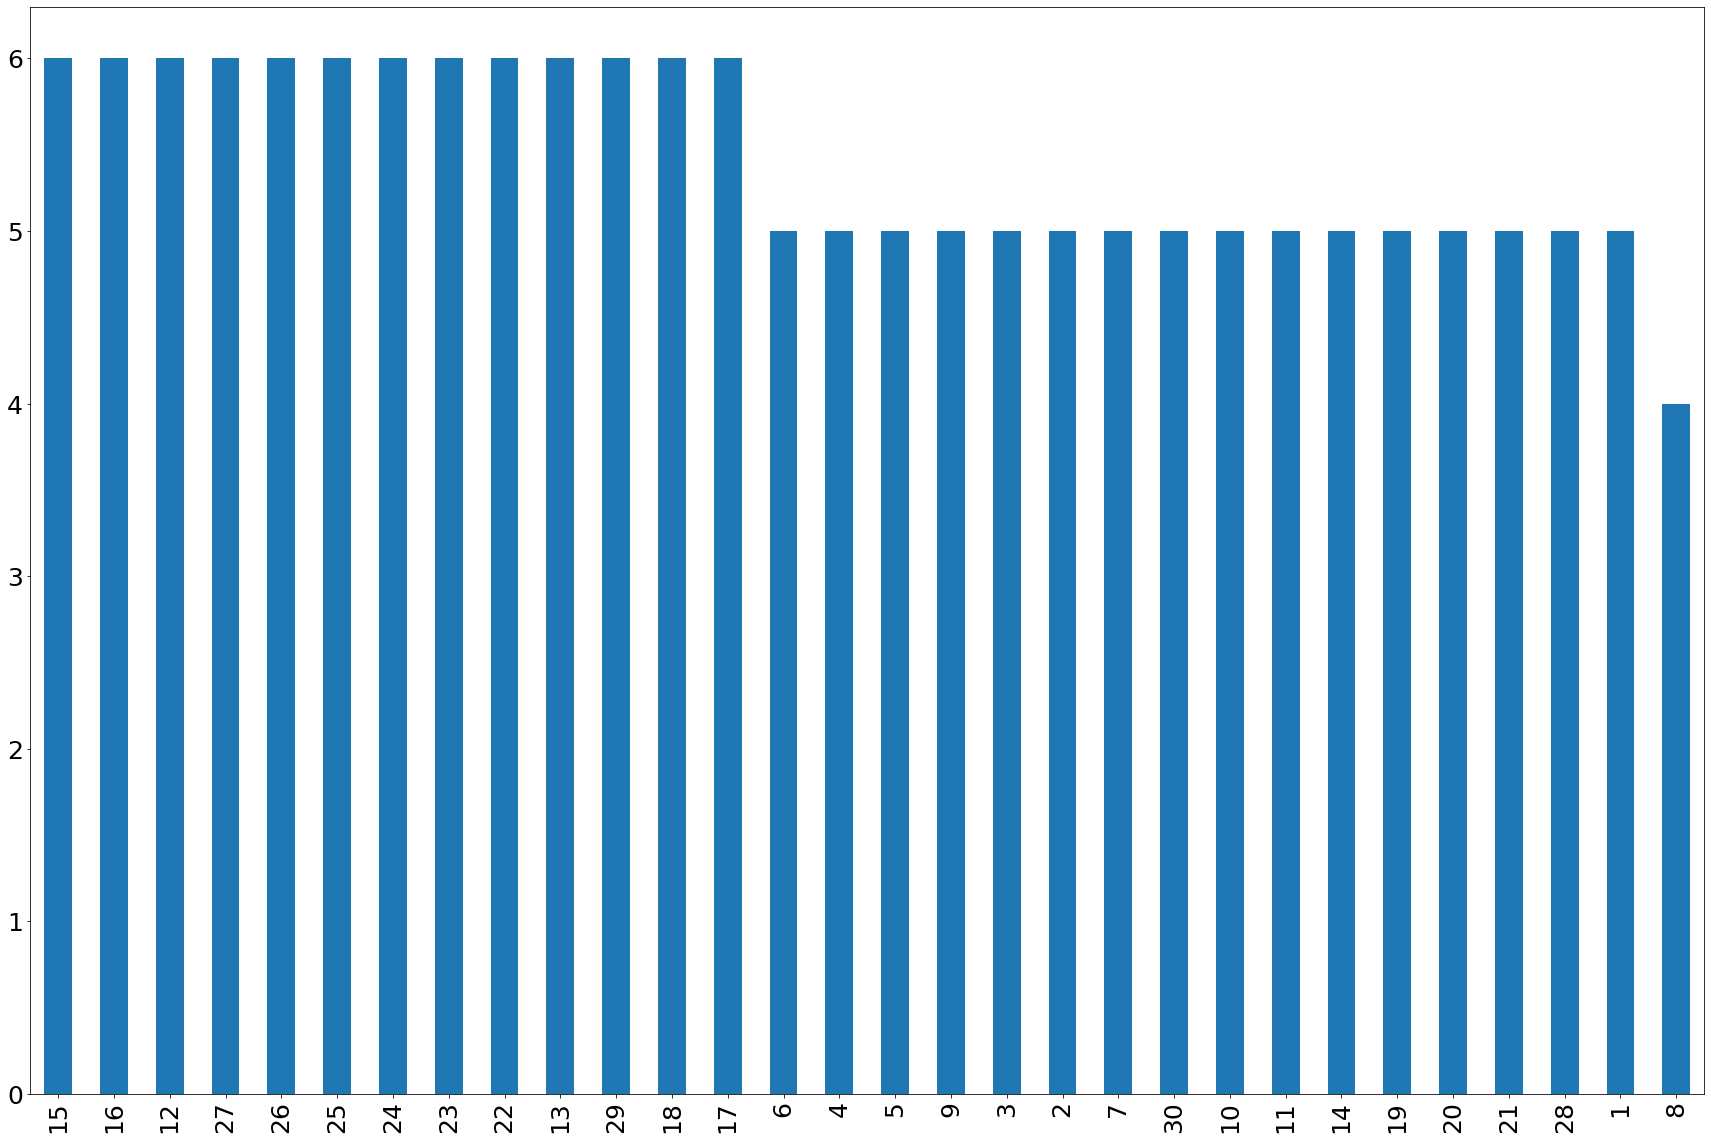

In [14]:
calendar[calendar["event_name_1"] != 0]["event_name_1"].value_counts().plot(kind="bar")

In [15]:
calendar[(calendar["snap_CA"] == 1) & (calendar["snap_TX"] == 1) & (calendar["snap_WI"] == 1)].head(20)

,date,wm_yr_wk,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
5,2011-02-03,11101,6,2,2011,d_6,0,0,0,0,1,1,1
7,2011-02-05,11102,1,2,2011,d_8,0,0,0,0,1,1,1
8,2011-02-06,11102,2,2,2011,d_9,27,4,0,0,1,1,1
11,2011-02-09,11102,5,2,2011,d_12,0,0,0,0,1,1,1
33,2011-03-03,11105,6,3,2011,d_34,0,0,0,0,1,1,1
35,2011-03-05,11106,1,3,2011,d_36,0,0,0,0,1,1,1
36,2011-03-06,11106,2,3,2011,d_37,0,0,0,0,1,1,1
39,2011-03-09,11106,5,3,2011,d_40,12,3,0,0,1,1,1
64,2011-04-03,11110,2,4,2011,d_65,0,0,0,0,1,1,1
66,2011-04-05,11110,4,4,2011,d_67,0,0,0,0,1,1,1


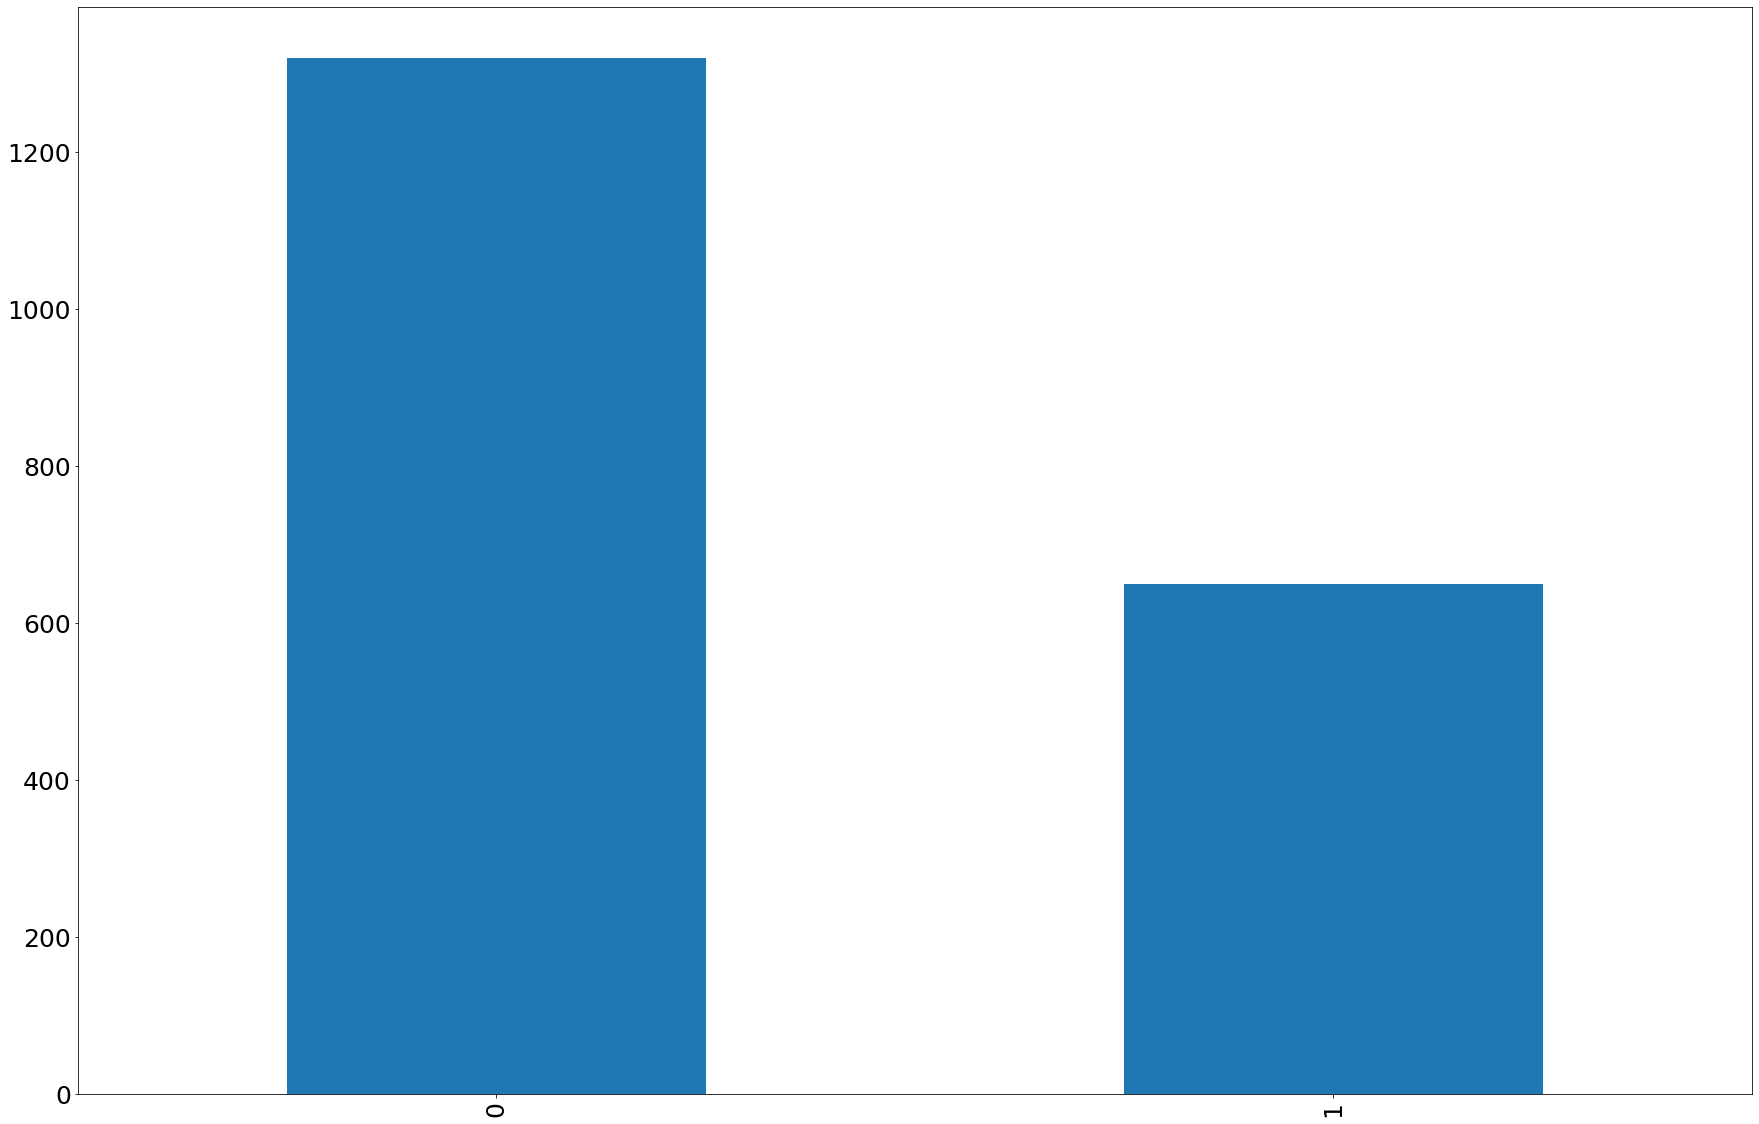

In [16]:
calendar["snap_CA"].value_counts().plot(kind="bar")

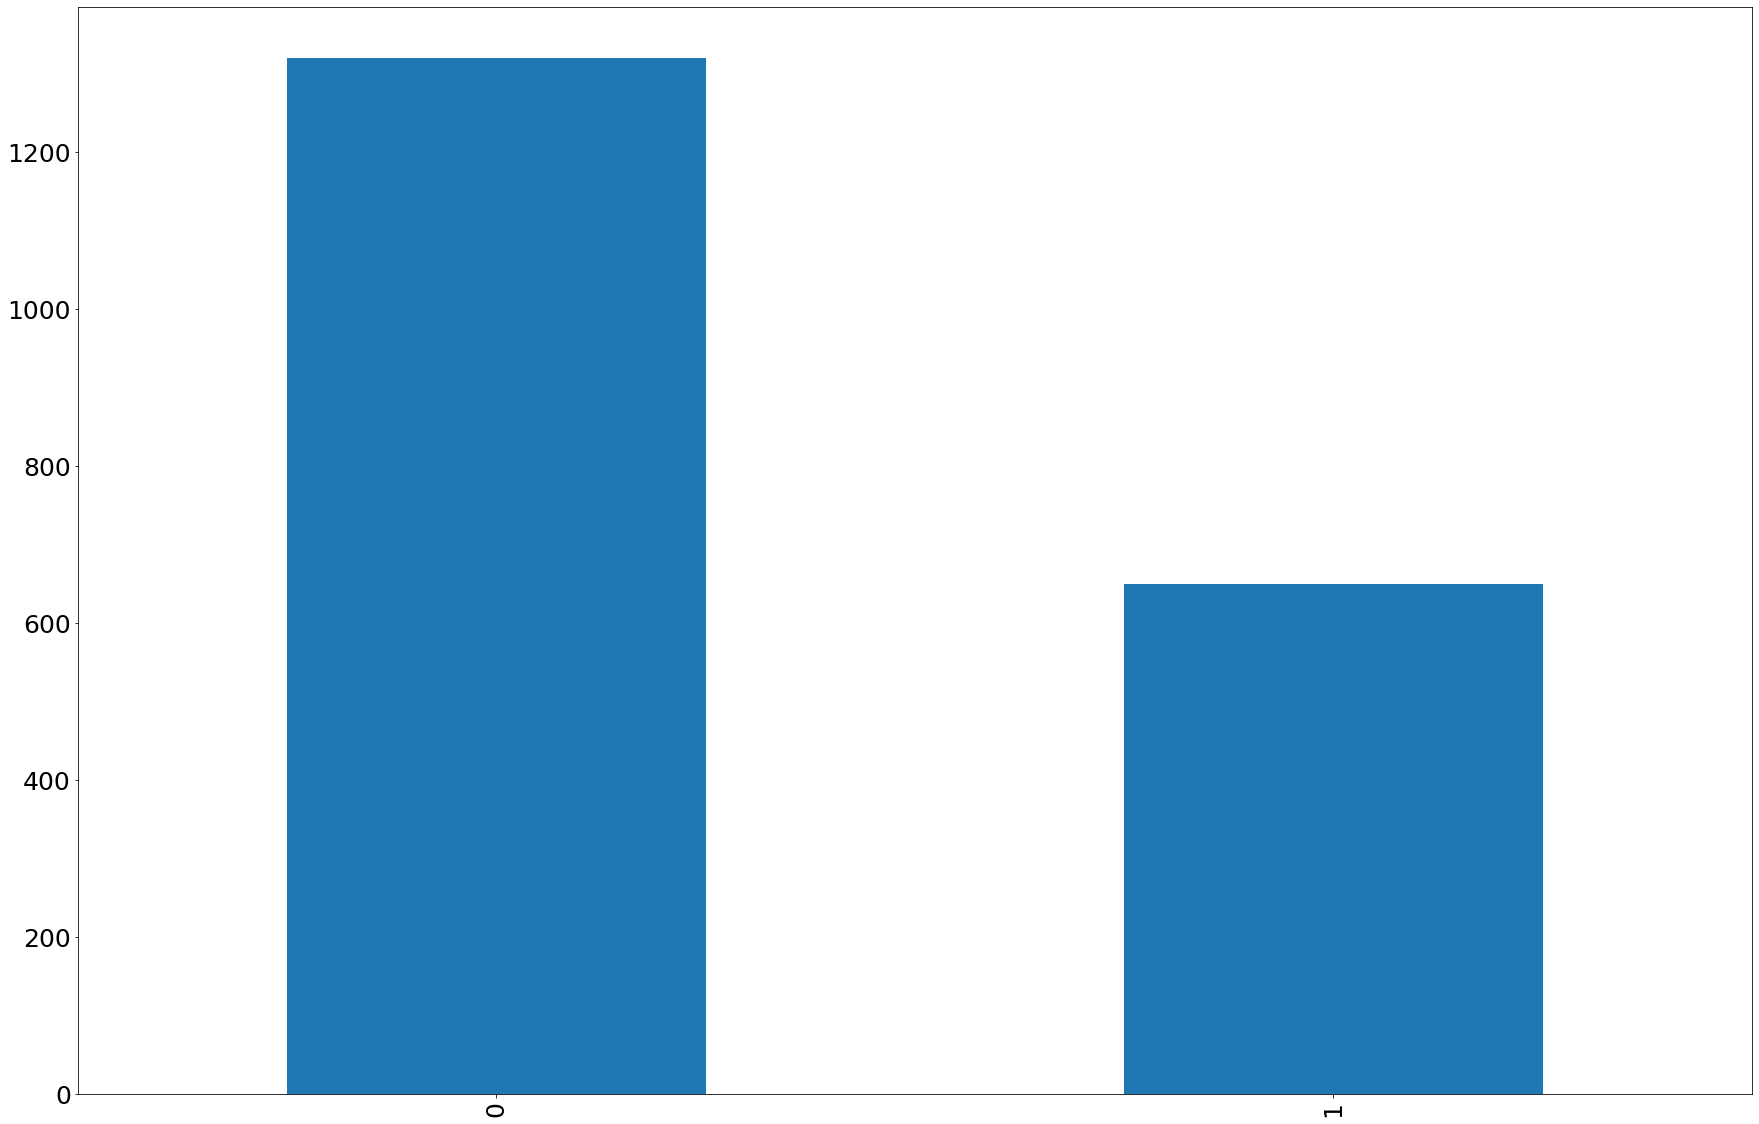

In [17]:
calendar["snap_WI"].value_counts().plot(kind="bar")

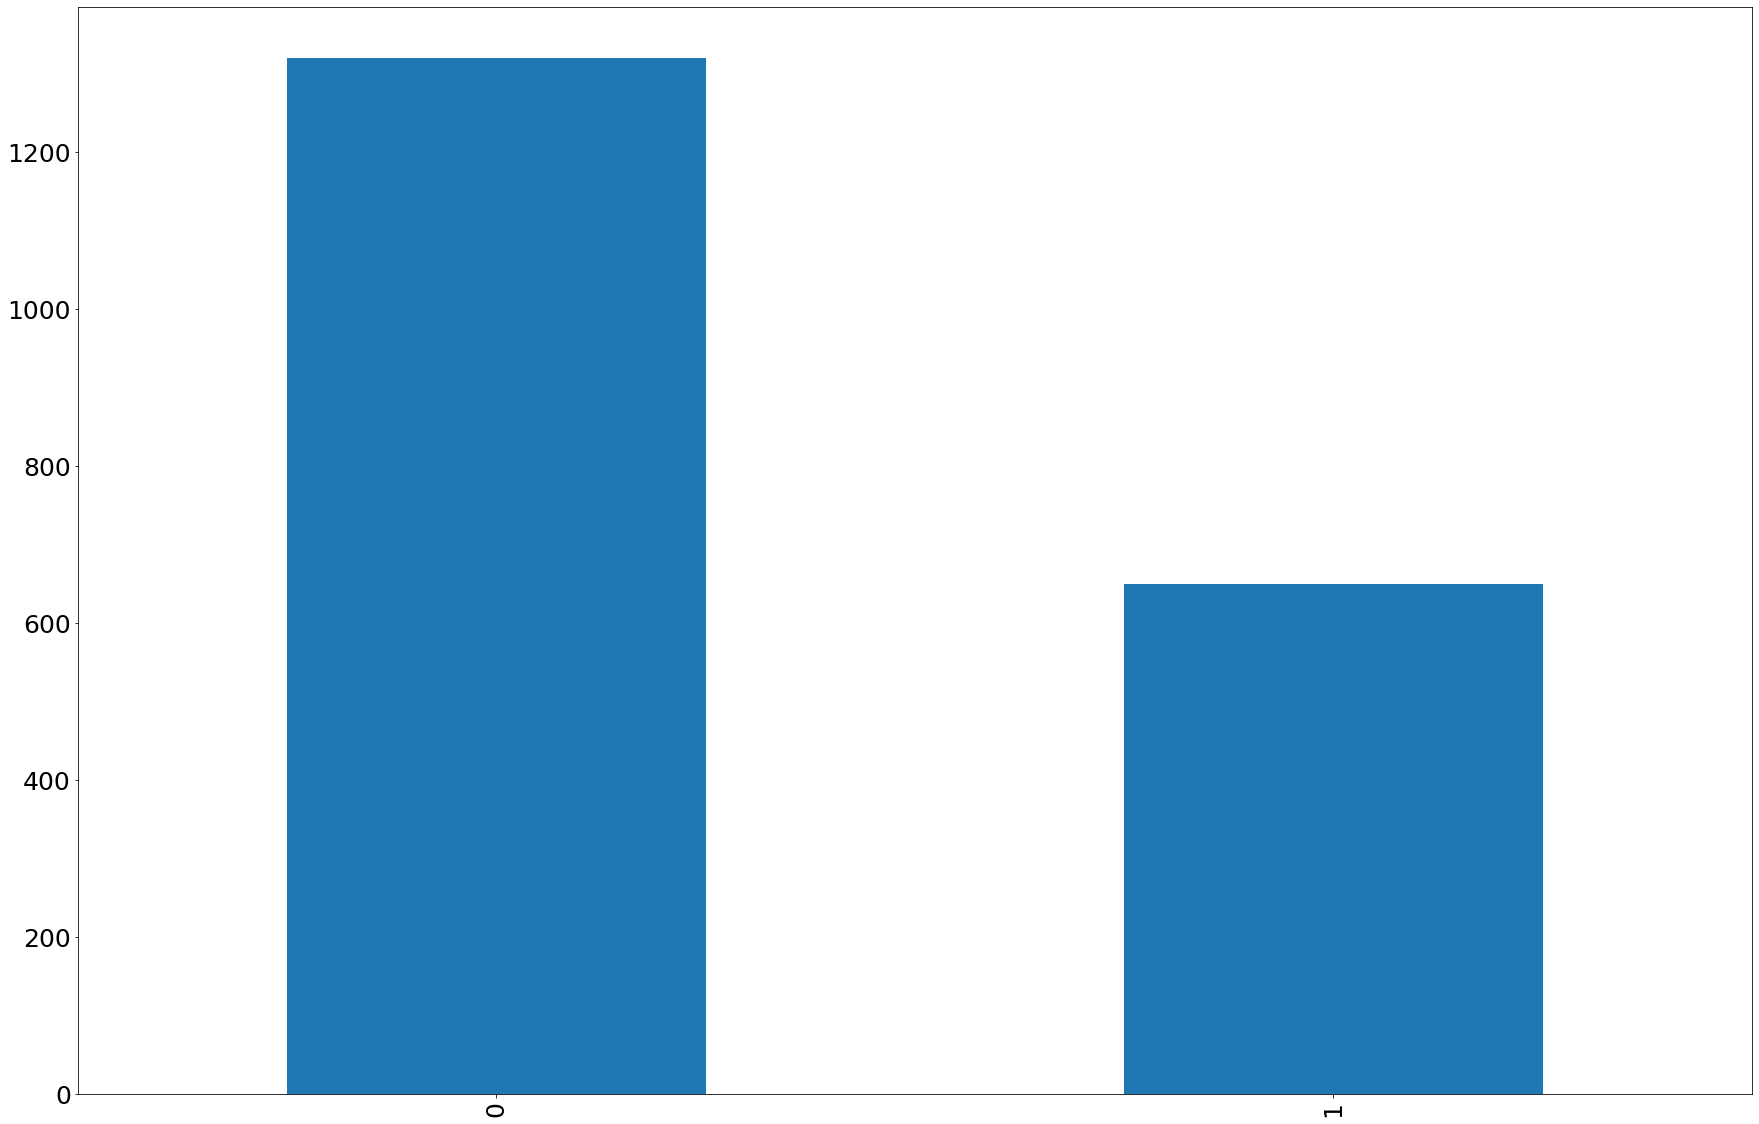

In [18]:
calendar["snap_TX"].value_counts().plot(kind="bar")

### Sales Data

In [19]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [20]:
sales.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 456.8 MB


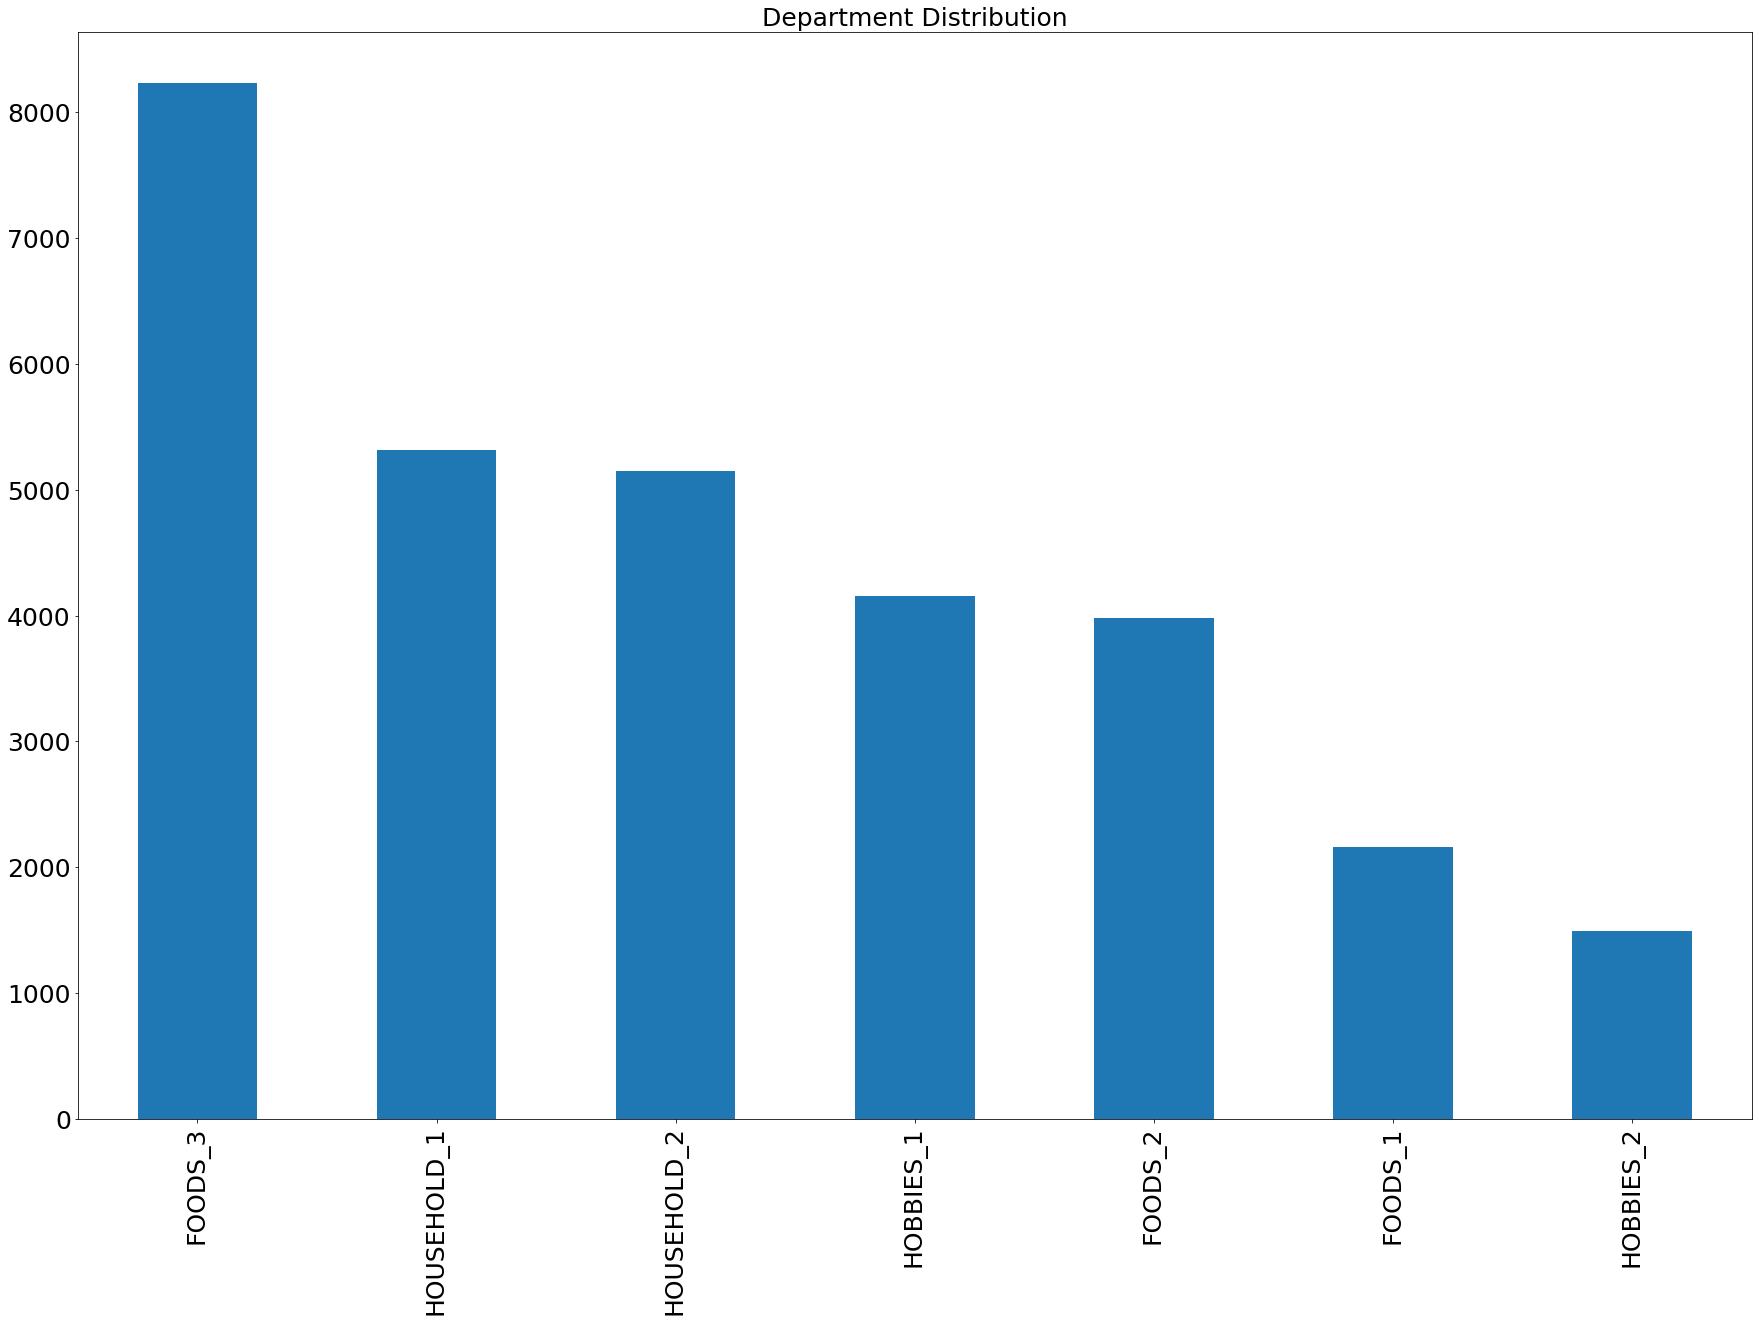

In [21]:
sales["dept_id"].value_counts().plot(kind="bar", title="Department Distribution")

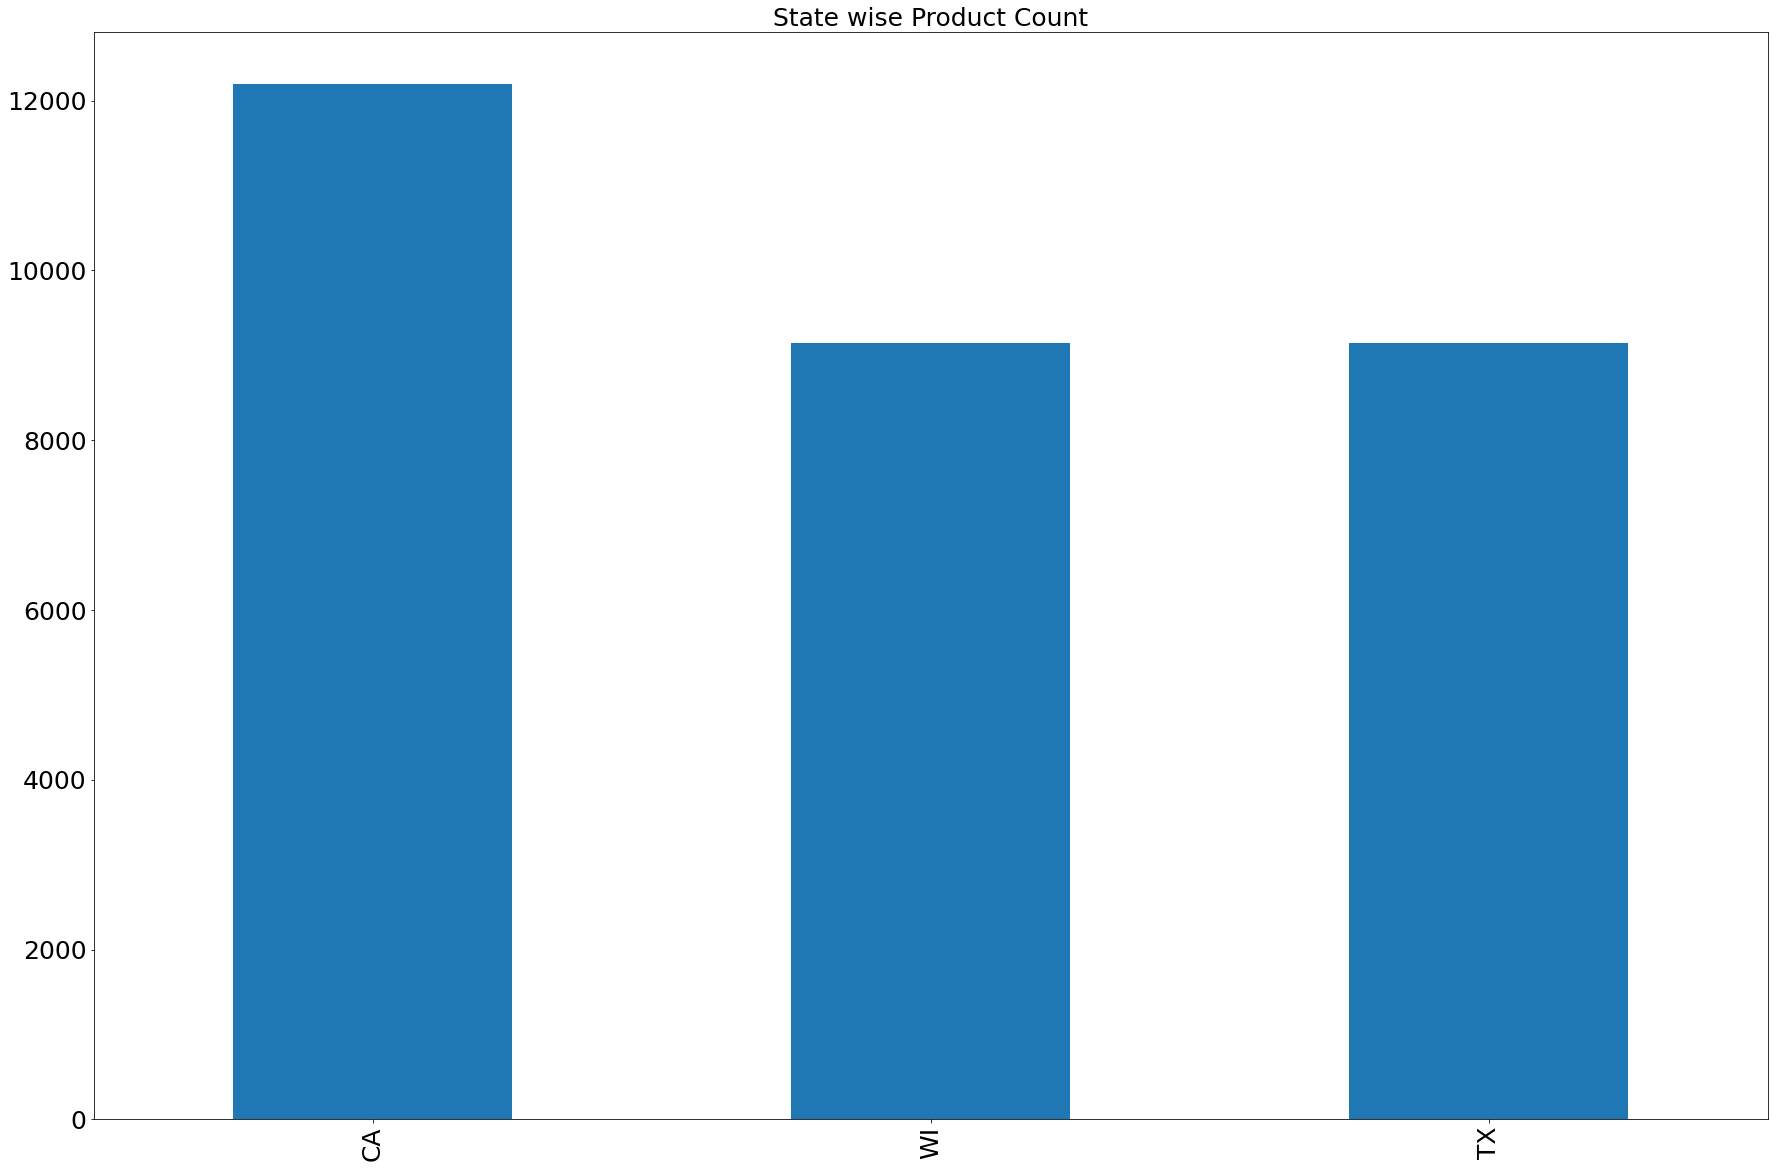

In [22]:
sales["state_id"].value_counts().plot(kind="bar", title="State wise Product Count")

In [23]:
days_list = list(filter(lambda column_name:  re.search(r"d_.*", column_name), list(sales.columns)))

In [24]:
sales["total_sales"] = sales[days_list].sum(axis=1)
days_wise_sales = sales[days_list].sum(axis=0)

In [25]:
days_date_mapping = {each_day : np.datetime_as_string(calendar[calendar["d"] == each_day]["date"].values[0], unit='D') for each_day in days_list}
sales.rename(columns=days_date_mapping, inplace=True)    

In [26]:
sales.sort_values(by="total_sales", ascending=False).head()

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,total_sales
8412,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,108,132,102,120,...,160,204,86,100,88,77,141,139,130,250502
18055,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,98,85,47,56,...,78,102,54,67,57,59,80,100,75,192835
21104,FOODS_3_586_TX_3_validation,FOODS_3_586,FOODS_3,FOODS,TX_3,TX,115,116,71,66,...,67,69,49,55,60,55,55,66,47,150122
8908,FOODS_3_586_CA_3_validation,FOODS_3_586,FOODS_3,FOODS,CA_3,CA,56,55,45,57,...,85,91,77,75,70,48,61,74,78,134386
2314,FOODS_3_090_CA_1_validation,FOODS_3_090,FOODS_3,FOODS,CA_1,CA,107,182,47,47,...,82,83,30,45,29,53,87,95,42,127203


#### Selling Trend Of  FOODS_3_090_CA_3_validation

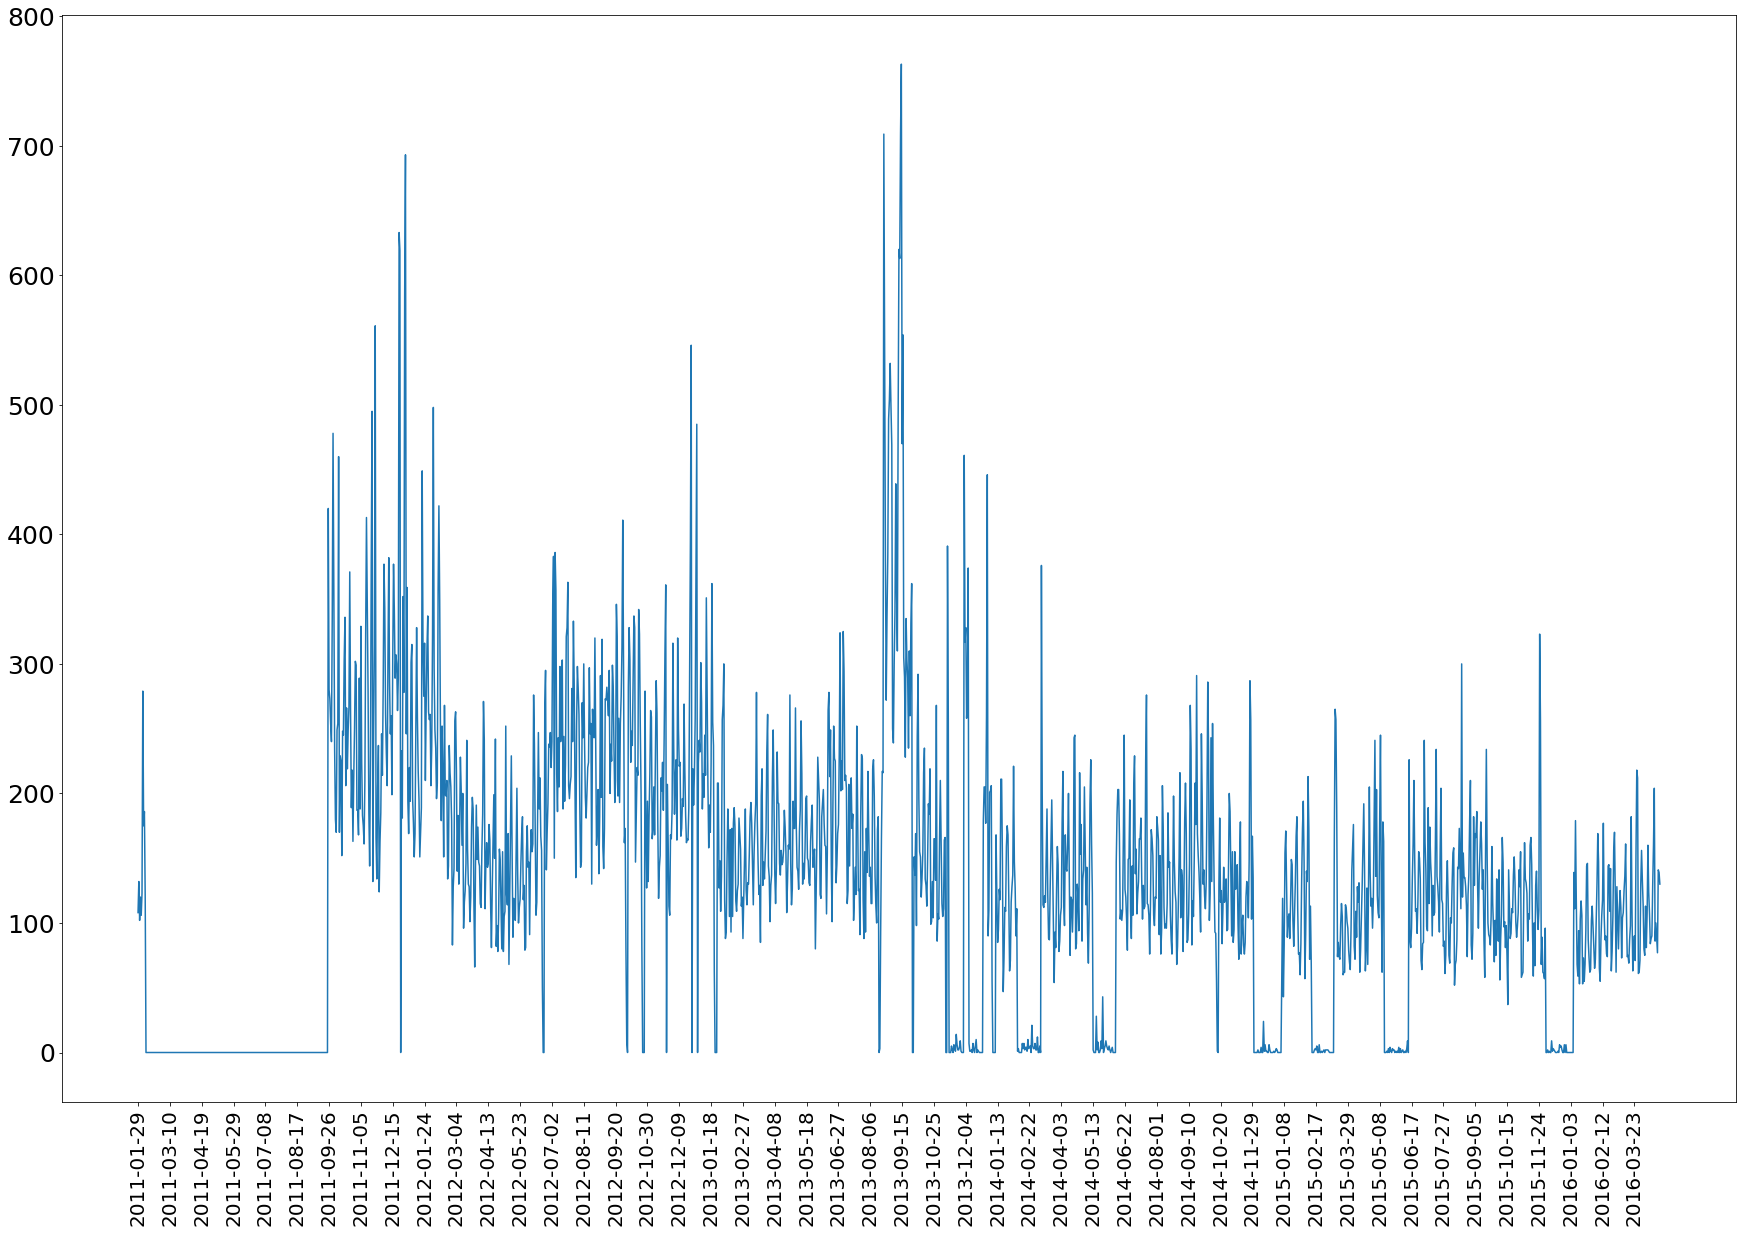

In [27]:
plt.figure(figsize=(30,20))
plt.plot(sales.sort_values(by="total_sales", ascending=False)[list(days_date_mapping.values())].head(1).T)
plt.xticks(list(days_date_mapping.values())[::40],  rotation='vertical', fontsize=20)
plt.show()

#### Selling Trend Of  FOODS_3_586_TX_2_validation

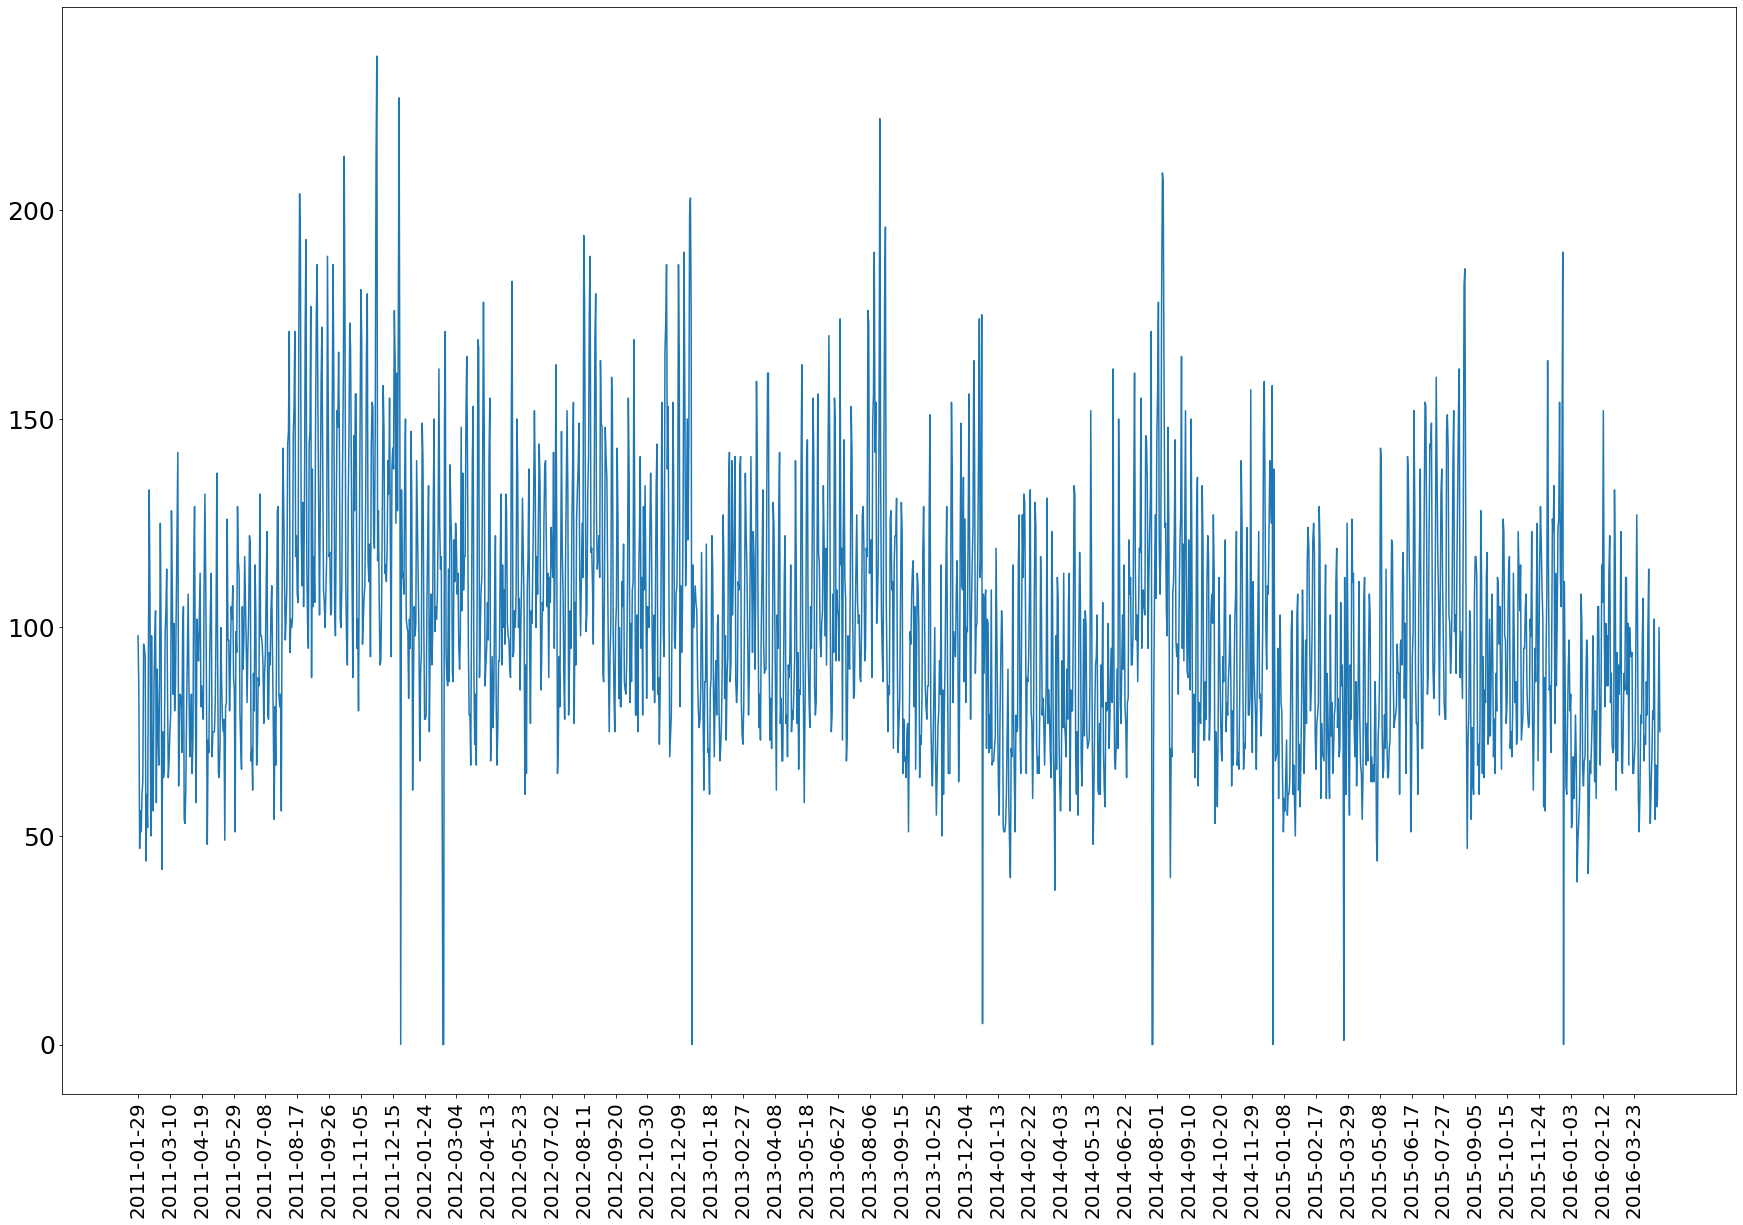

In [28]:
plt.figure(figsize=(30,20))
plt.plot(sales.sort_values(by="total_sales", ascending=False)[list(days_date_mapping.values())].iloc[[1]].T)
plt.xticks(list(days_date_mapping.values())[::40],  rotation='vertical', fontsize=20)
plt.show()

In [29]:
days_wise_sales = pd.DataFrame({"d": days_wise_sales.index, "total_day_sales": days_wise_sales.values})

In [30]:
calendar = calendar.merge(days_wise_sales, on="d")

In [31]:
calendar.head()

,date,wm_yr_wk,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,total_day_sales
0,2011-01-29,11101,1,1,2011,d_1,0,0,0,0,0,0,0,32631
1,2011-01-30,11101,2,1,2011,d_2,0,0,0,0,0,0,0,31749
2,2011-01-31,11101,3,1,2011,d_3,0,0,0,0,0,0,0,23783
3,2011-02-01,11101,4,2,2011,d_4,0,0,0,0,1,1,0,25412
4,2011-02-02,11101,5,2,2011,d_5,0,0,0,0,1,0,1,19146


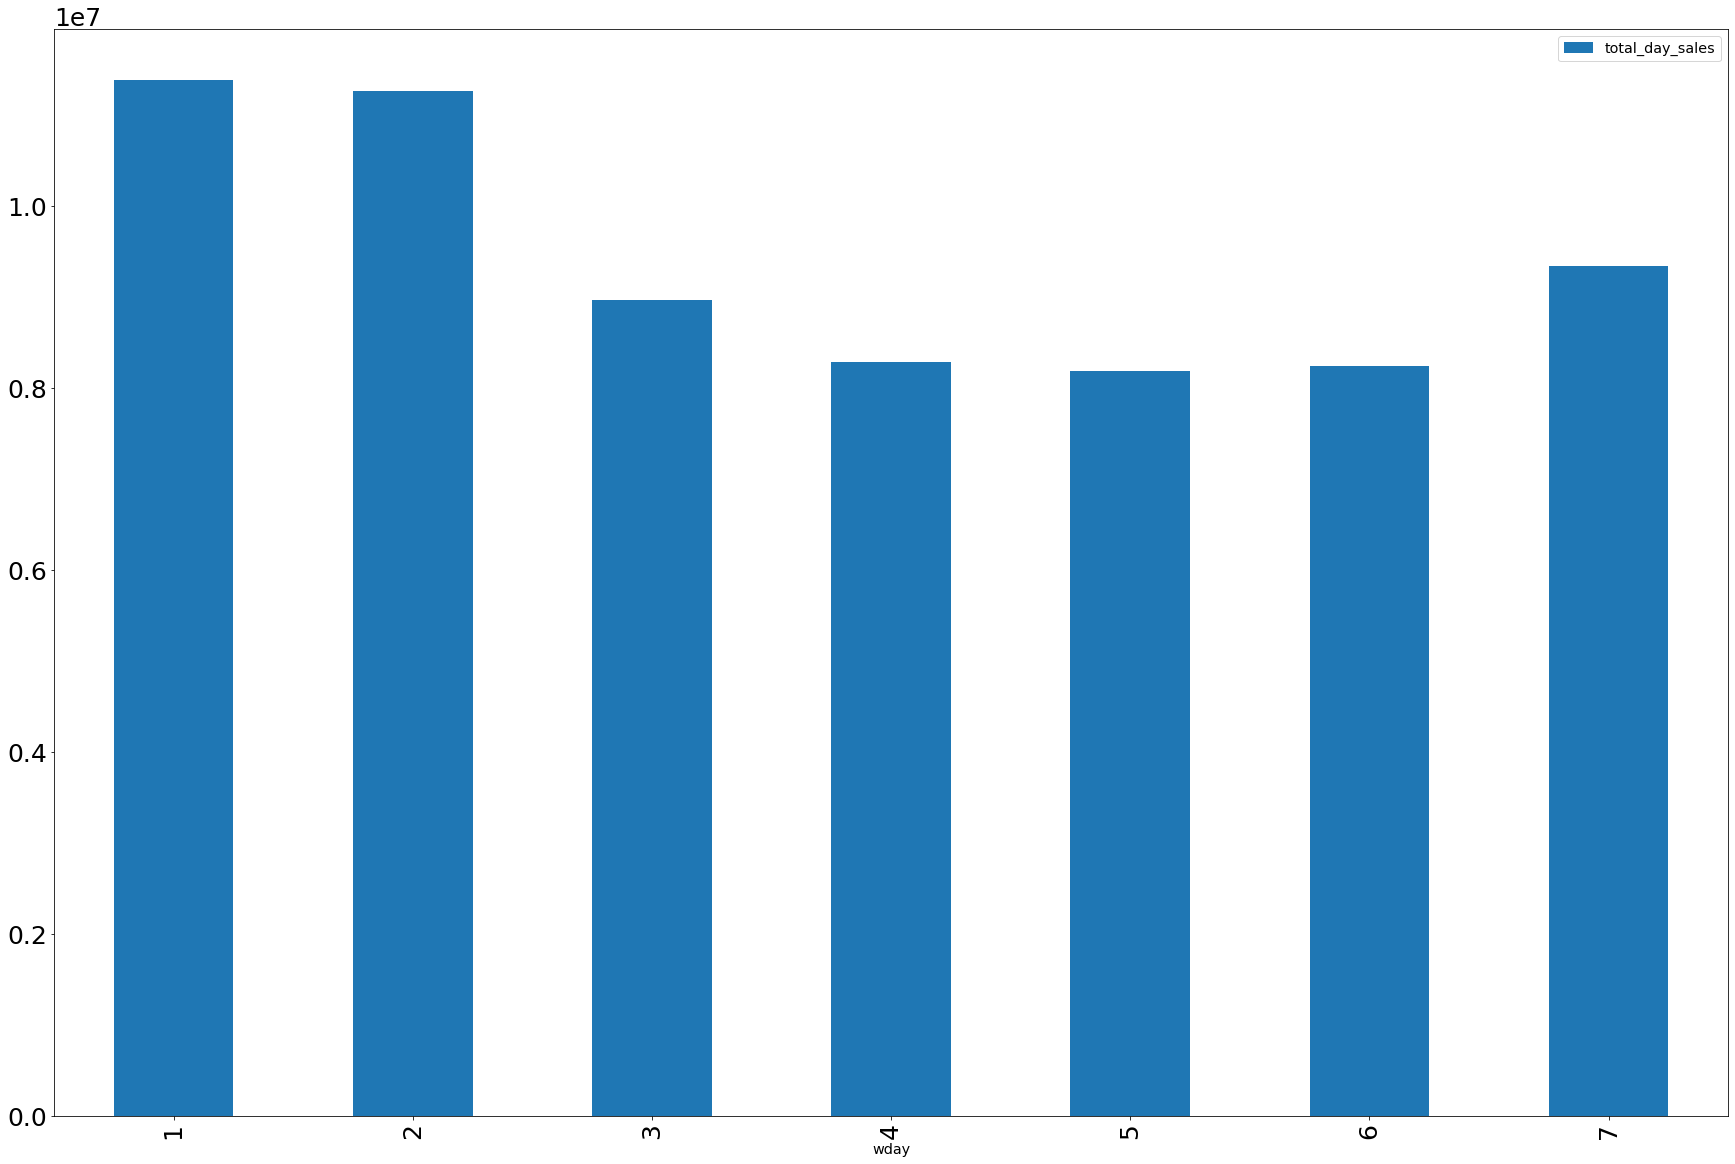

In [32]:
calendar[["wday", "total_day_sales"]].groupby("wday").sum().plot(kind="bar")

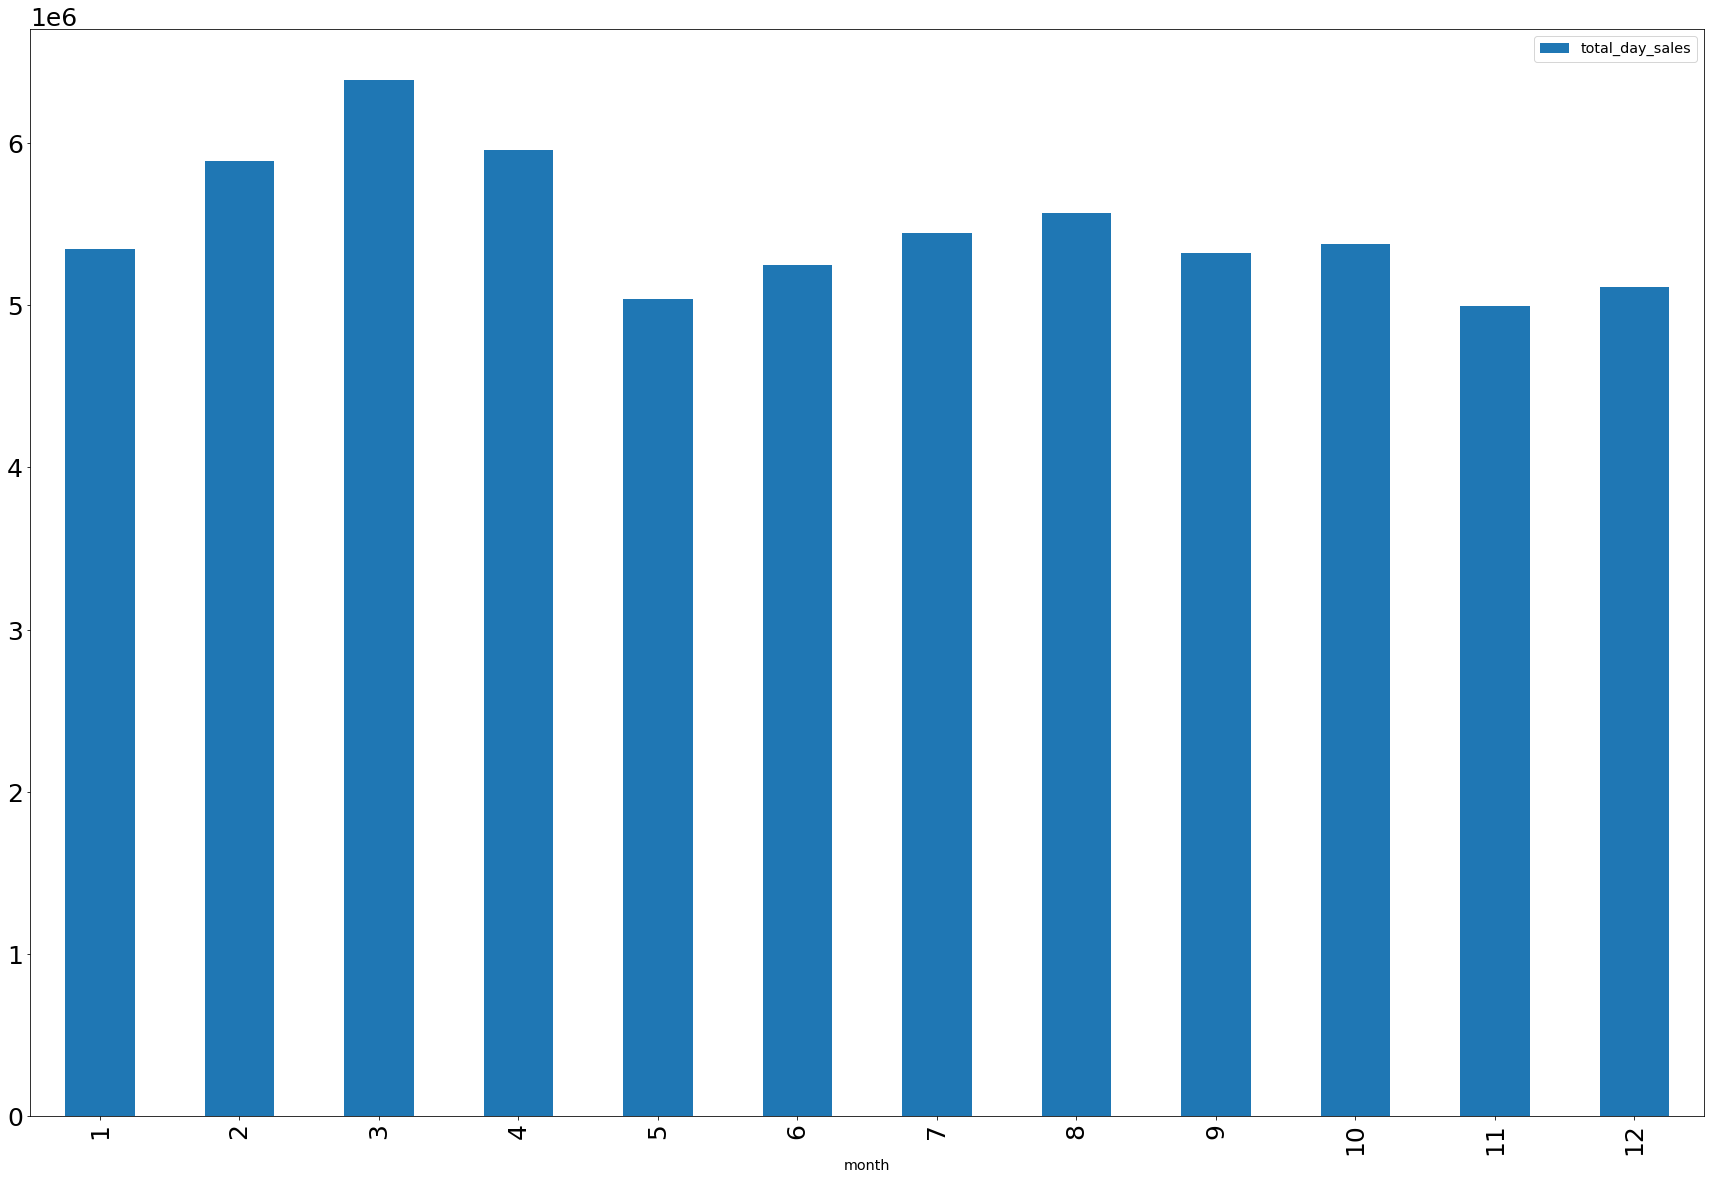

In [33]:
calendar[["month", "total_day_sales"]].groupby("month").sum().plot(kind="bar")

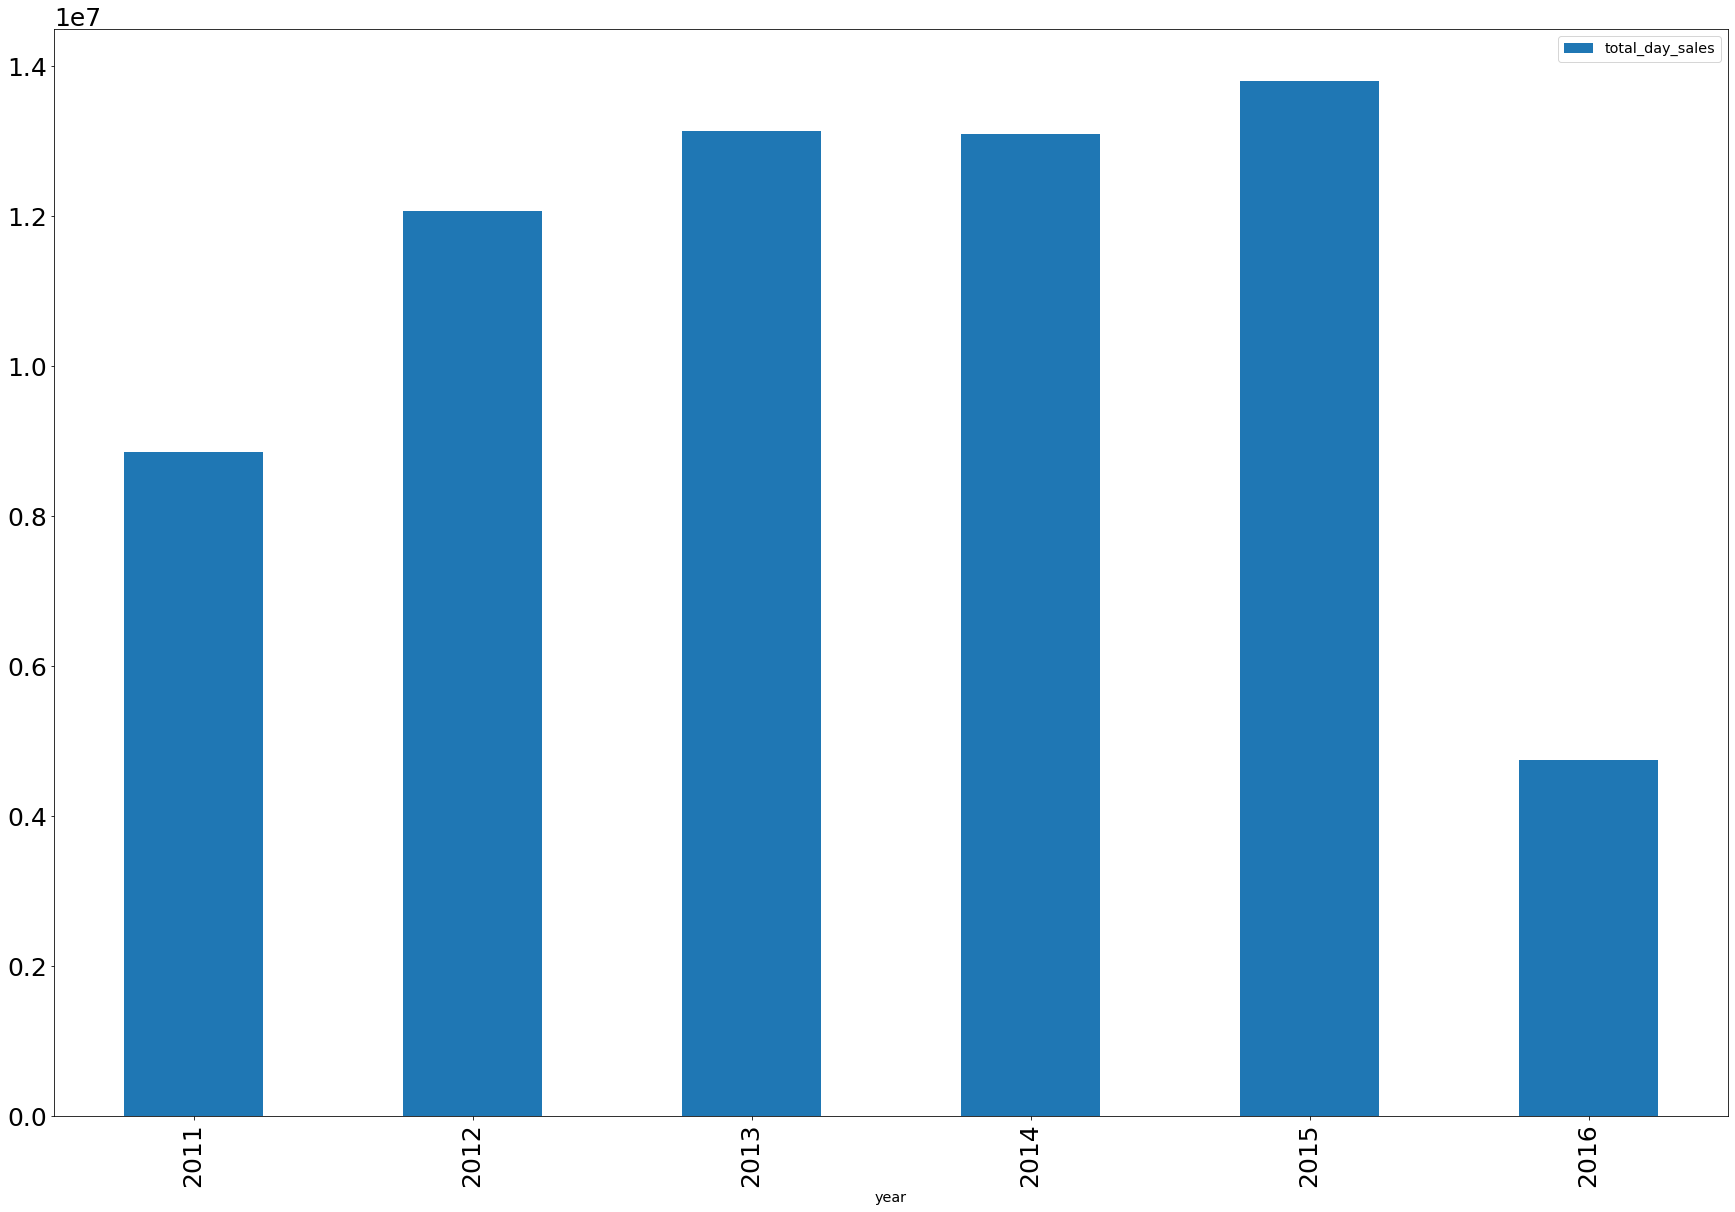

In [34]:
calendar[["year", "total_day_sales"]].groupby("year").sum().plot(kind="bar")

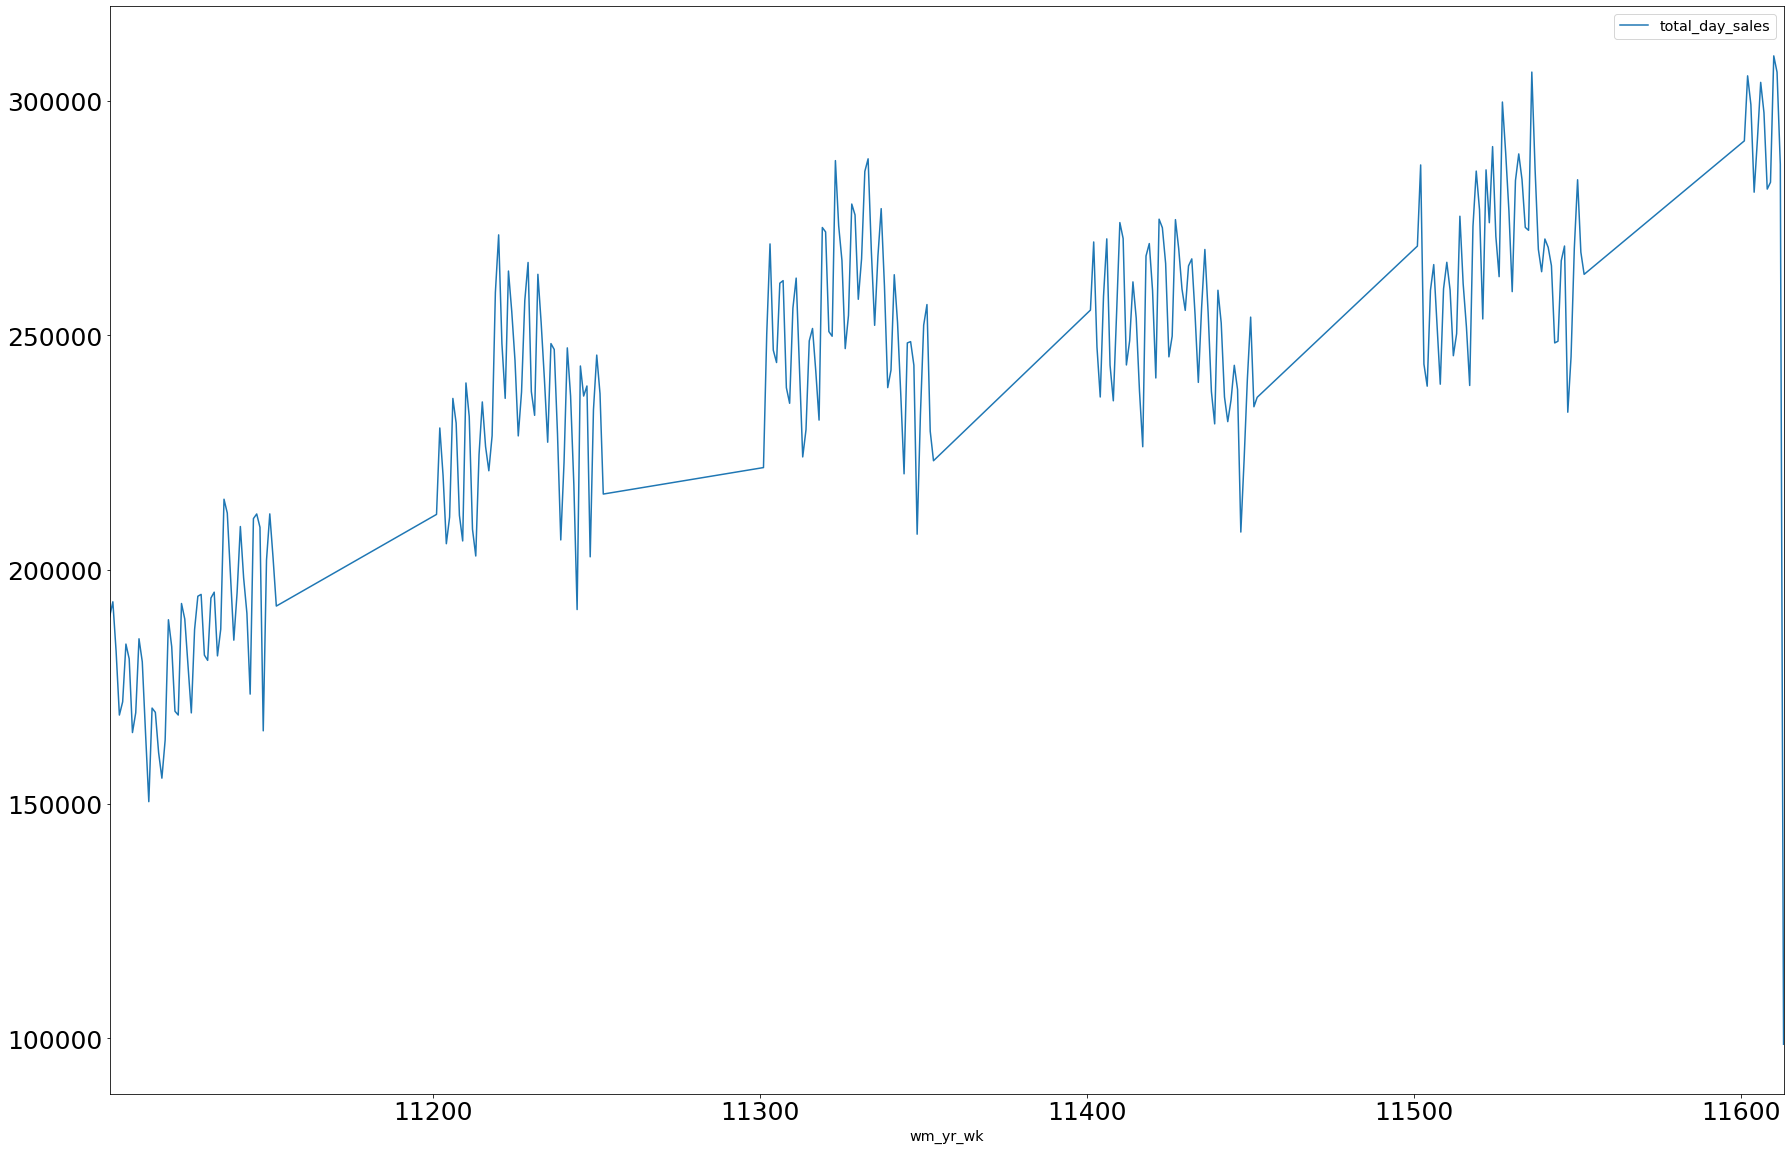

In [36]:
calendar[["wm_yr_wk", "total_day_sales"]].groupby("wm_yr_wk").sum().plot()

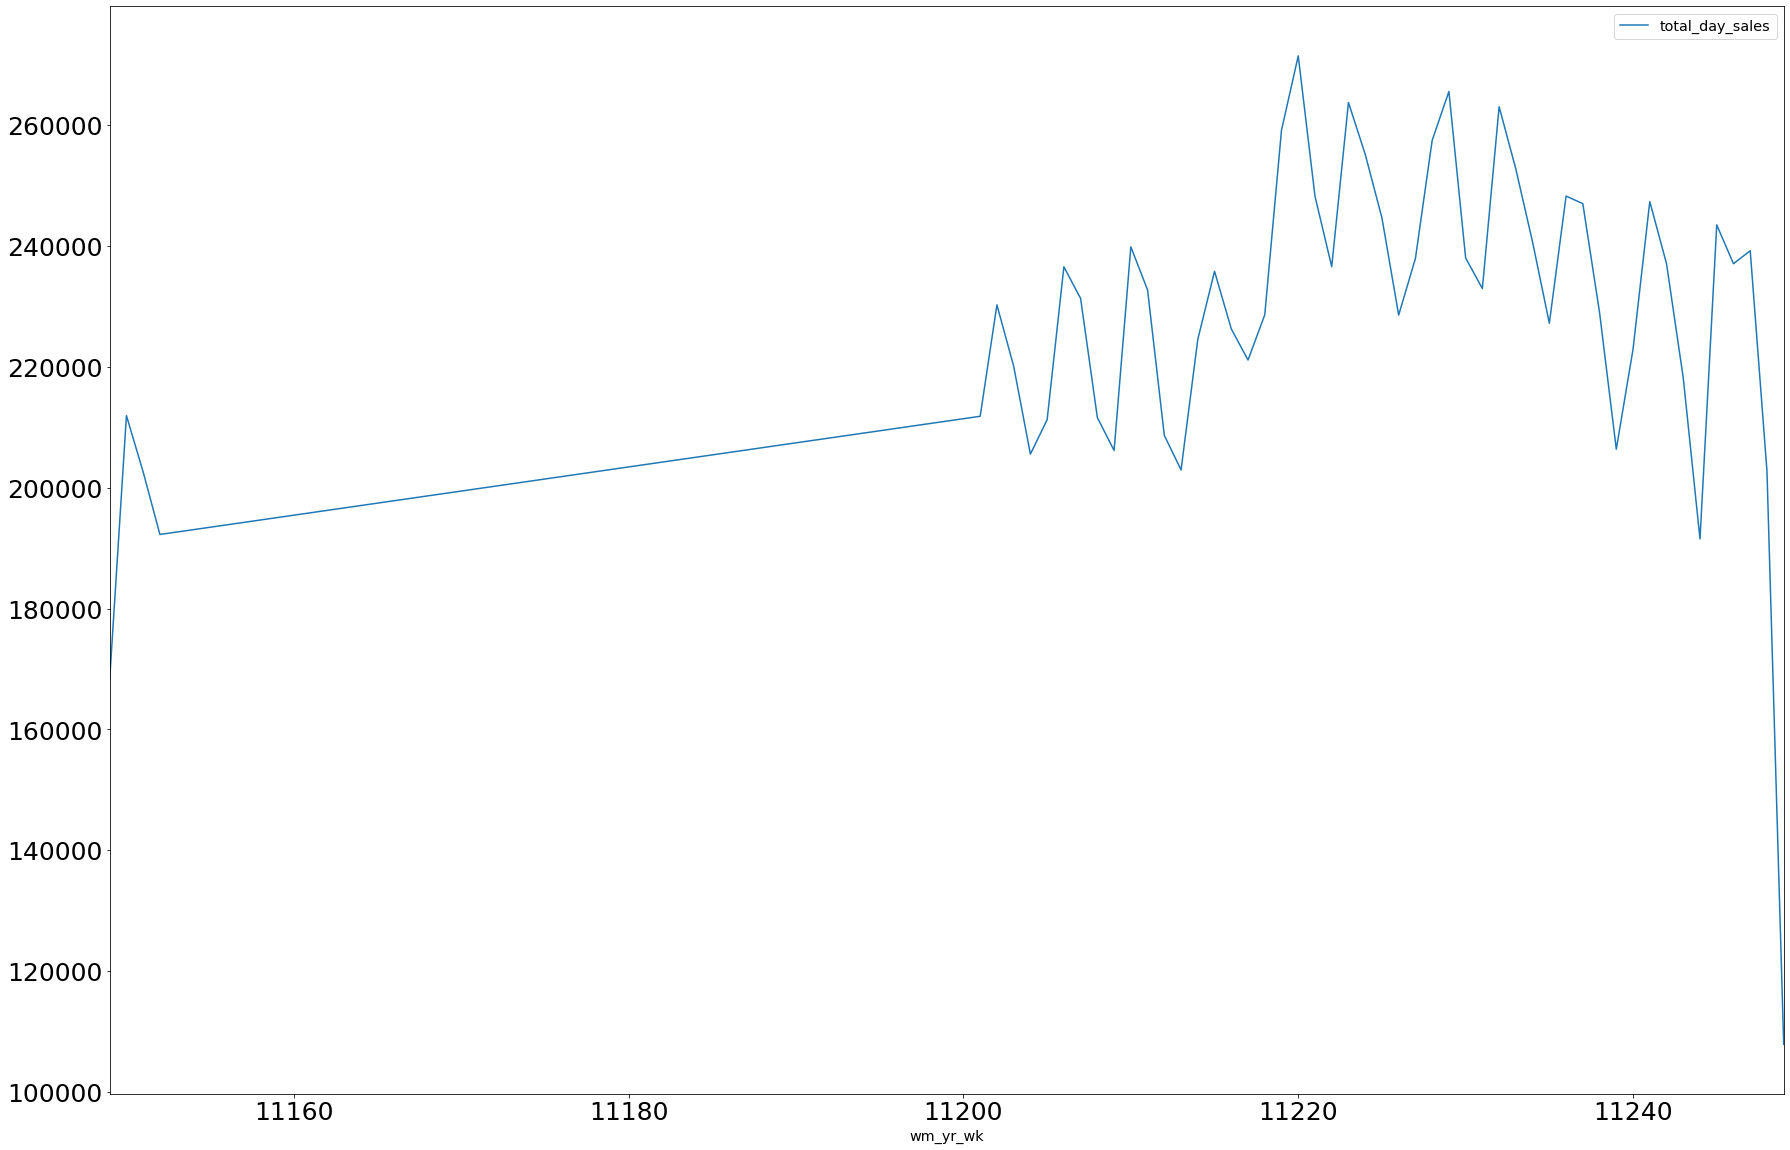

In [45]:
calendar[calendar["year"] == 2012][["wm_yr_wk", "total_day_sales"]].groupby("wm_yr_wk").sum().plot()

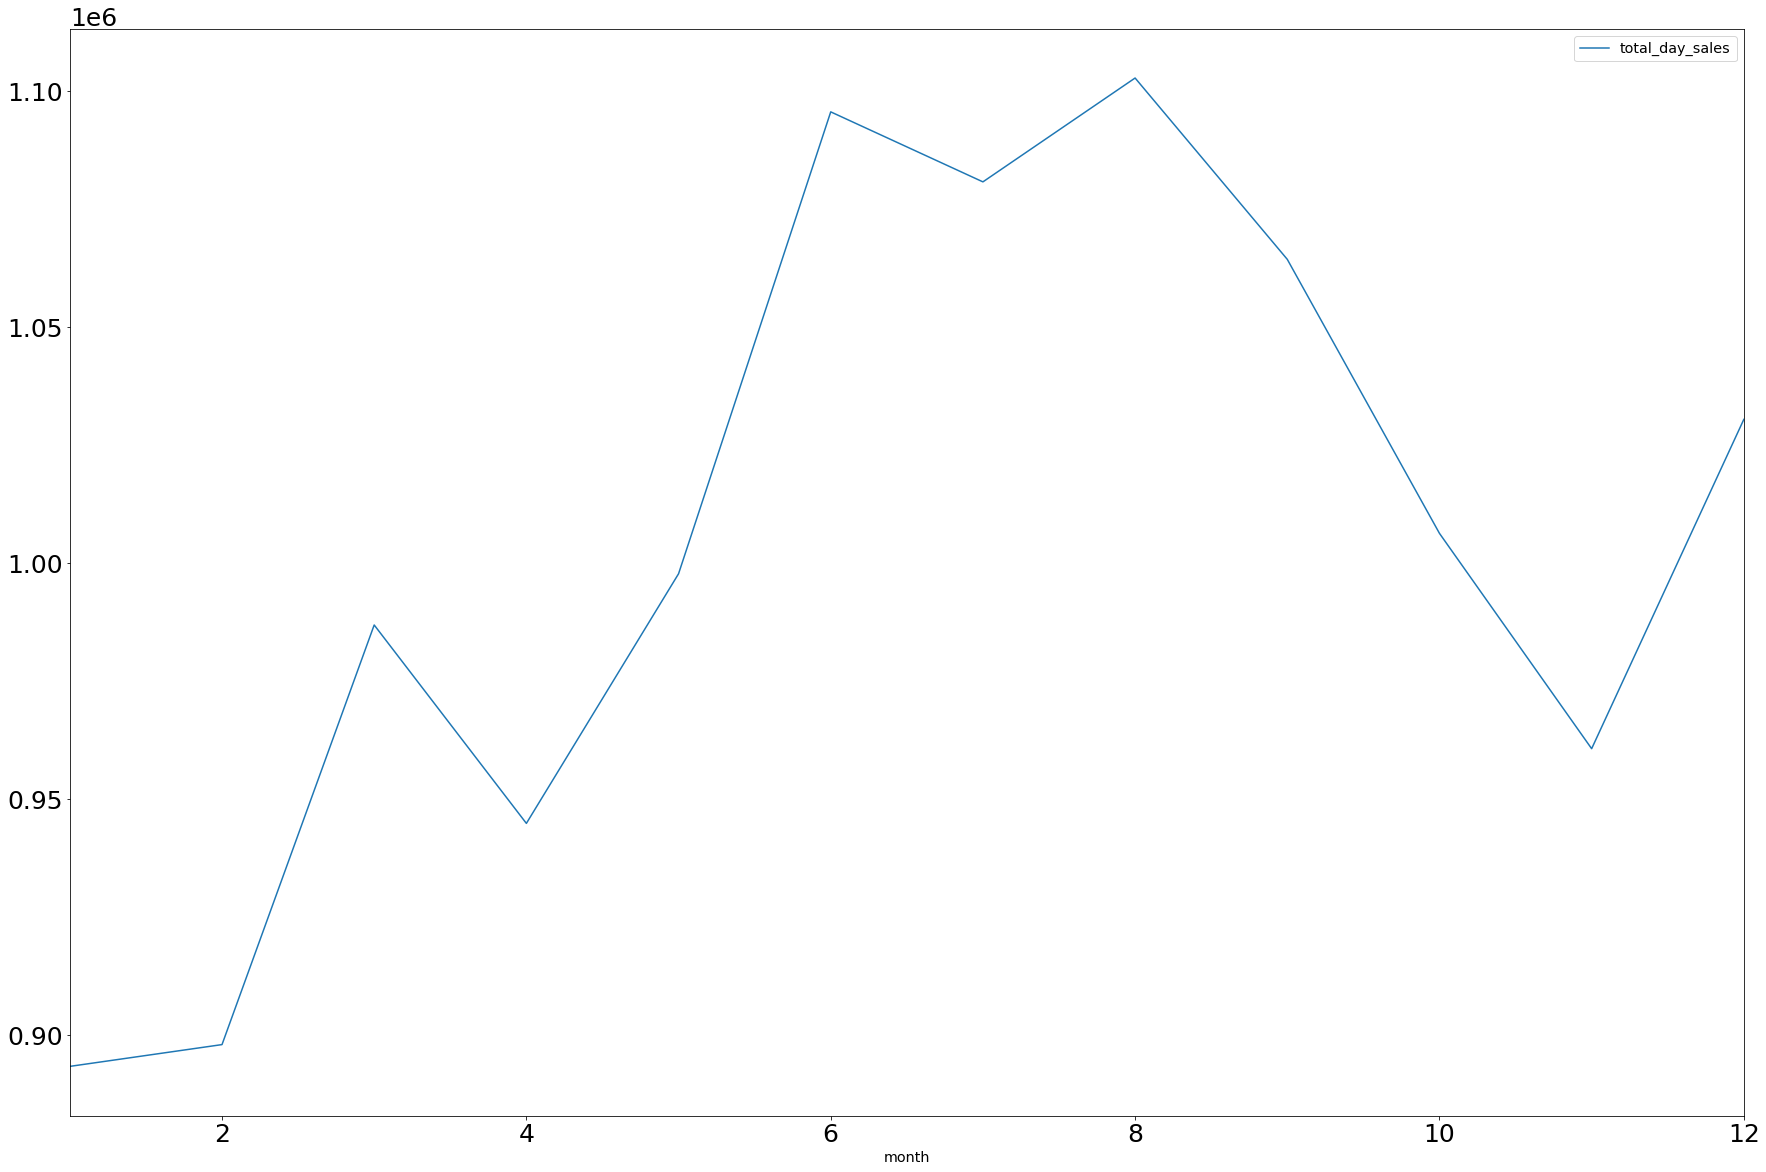

In [46]:
calendar[calendar["year"] == 2012][["month", "total_day_sales"]].groupby("month").sum().plot()

From above pattern we can see that sale is very less at the beginning of the year and end of the year. This might be because of festival season

### Sell Price Data

In [47]:
sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [48]:
sell_price.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 957.5 MB


In [49]:
sell_price[["wm_yr_wk", "sell_price"]] = sell_price[["wm_yr_wk", "sell_price"]].astype(np.uint16)
sell_price[["store_id", "item_id"]] = sell_price[["store_id", "item_id"]].astype("category")

In [50]:
sell_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      category
item_id       category
wm_yr_wk      uint16
sell_price    uint16
dtypes: category(2), uint16(2)
memory usage: 45.8 MB


Text(0.5, 1.0, 'Selling Price Distribution')

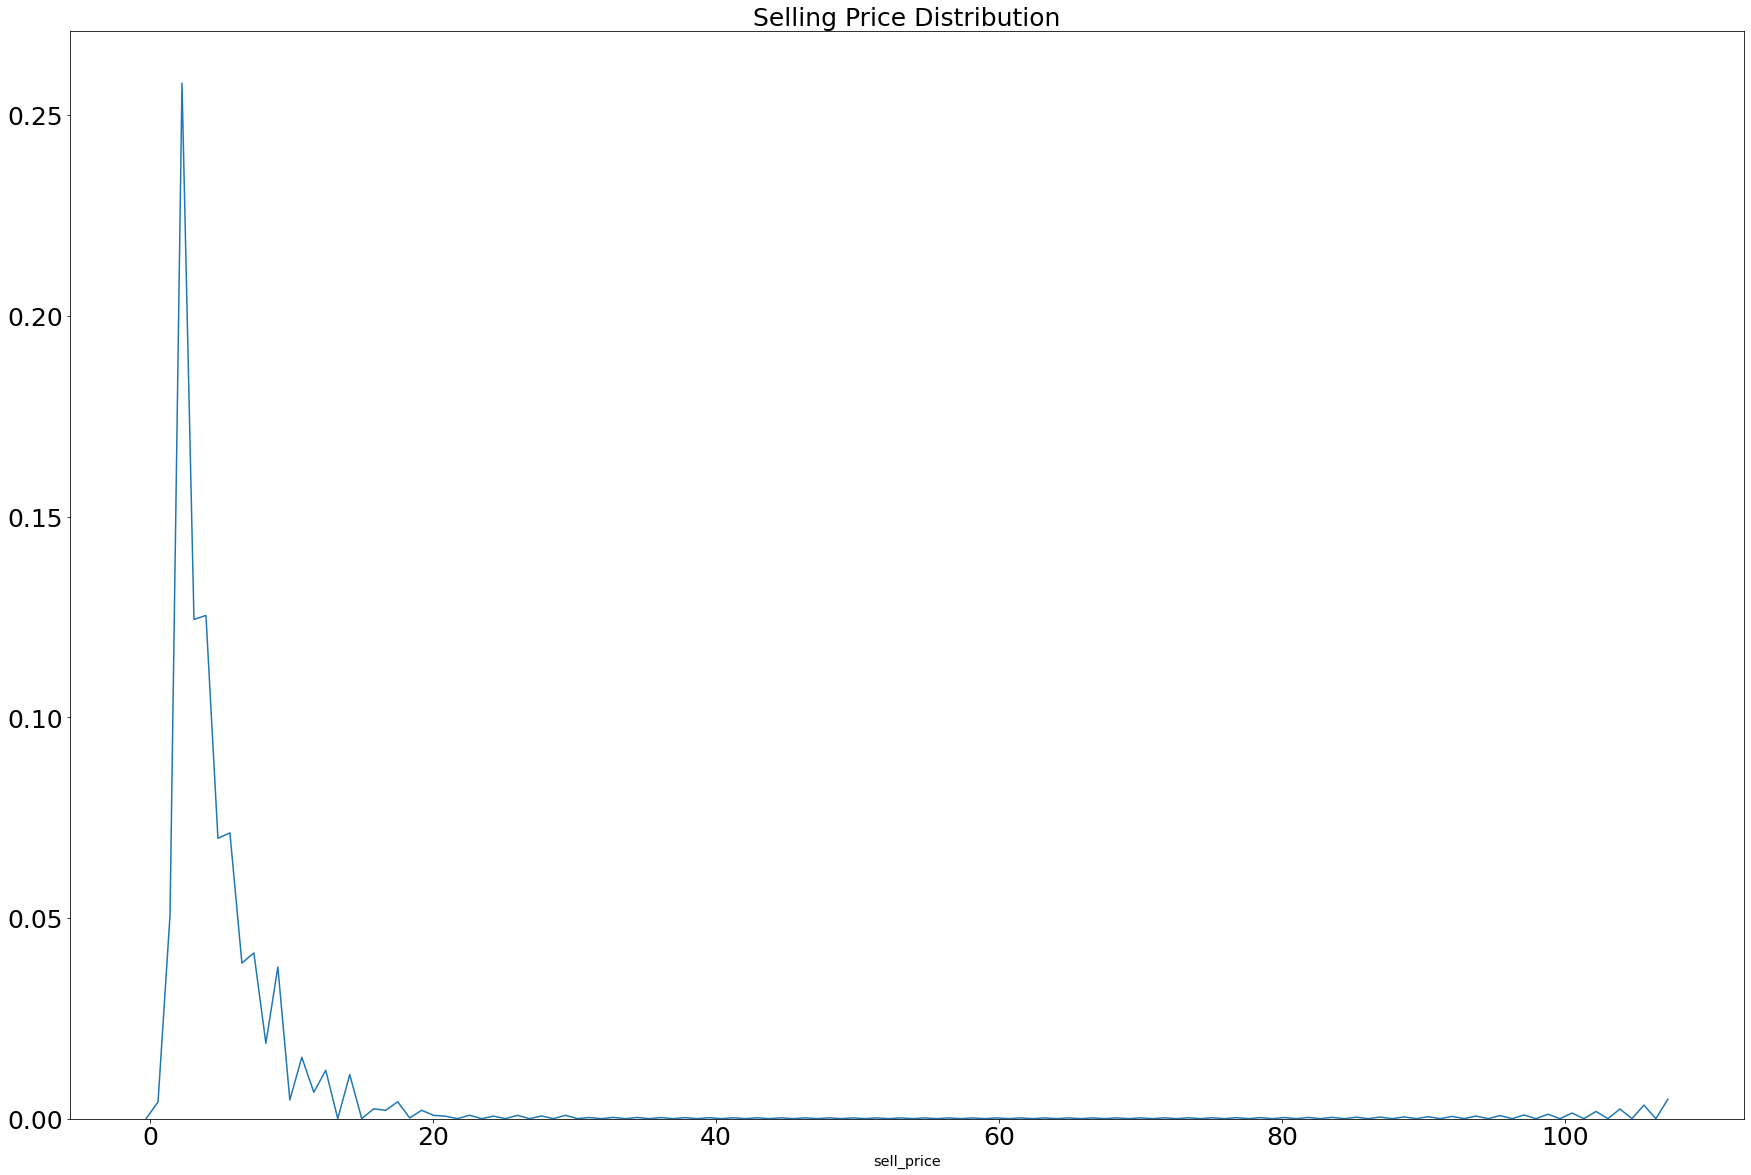

In [51]:
sns.distplot(sell_price["sell_price"], hist=False, bins=10).set_title("Selling Price Distribution")

In [ ]:
sales